# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow Tutorial

So far we've covered the basics of TensorFlow and built a handful of models to work across different problems.

Now we're going to get specific and see how a special kind of neural network, [convolutional neural networks (CNNs)](https://en.wikipedia.org/wiki/Convolutional_neural_network) can be used for computer vision (detecting patterns in visual data).

> 🔑 **Note:** In deep learning, many different kinds of model architectures can be used for different problems. For example, you could use a convolutional neural network for making predictions on image data and/or text data. However, in practice some architectures typically work better than others.

For example, you might want to:
* Classify whether a picture of food contains pizza 🍕 or steak 🥩 (we're actually going to do this)
* Detect whether or not an object appears in an image (e.g. did a specific car pass through a security camera?)

In this notebook, we're going to follow the TensorFlow modelling workflow we've been following so far whilst learning about how to build and use CNNs.

## What we're going to cover

Specifically, we're going to go through the follow with TensorFlow:

- Getting a dataset to work with
- Architecture of a convolutional neural network
- A quick end-to-end example (what we're working towards)
- Steps in modelling for binary image classification with CNNs
  - Becoming one with the data
  - Preparing data for modelling
  - Creating a CNN model (starting with a baseline)
  - Fitting a model (getting it to find patterns in our data)
  - Evaluating a model
  - Improving a model
  - Making a prediction with a trained model
- Steps in modelling for multi-class image classification with CNNs
 - Same as above (but this time with a different dataset)



In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-06-10 09:13:12--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.122.128, 172.253.63.128, 142.250.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.122.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   142MB/s    in 0.7s    

2021-06-10 09:13:13 (142 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



#Indpect The data (Become one with it)

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os
#Let's walk through piza_steak directory and list number of files
for dirpath, dir_names, filename in os.walk("pizza_steak"):
  print(f"There are {len(dir_names)} dictionaries and {len(filename)} images in '{dirpath}'.")

There are 2 dictionaries and 1 images in 'pizza_steak'.
There are 2 dictionaries and 1 images in 'pizza_steak/train'.
There are 0 dictionaries and 750 images in 'pizza_steak/train/steak'.
There are 0 dictionaries and 750 images in 'pizza_steak/train/pizza'.
There are 2 dictionaries and 1 images in 'pizza_steak/test'.
There are 0 dictionaries and 250 images in 'pizza_steak/test/steak'.
There are 0 dictionaries and 250 images in 'pizza_steak/test/pizza'.


In [ ]:
# The extra file in our pizza_steak directory is .DS_Store
!ls -la pizza_steak

total 24
drwxr-xr-x 4 root root 4096 Jun 10 09:13 .
drwxr-xr-x 1 root root 4096 Jun 10 09:13 ..
-rw-r--r-- 1 root root 6148 Jun 10 09:13 .DS_Store
drwxr-xr-x 4 root root 4096 Jun 10 09:13 test
drwxr-xr-x 4 root root 4096 Jun 10 09:13 train


In [ ]:
# another way to find out how many images in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

In [ ]:
num_steak_images_train

750

In [ ]:
## Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list of class names from subdirectories
class_names = class_names[1:] # Remove .DS_Store
print(class_names)

['pizza' 'steak']


In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (We will view images from here)
  target_folder = target_dir + target_class
  # get a random image_path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image Shape: {img.shape}") #show the shape of the image
  return img


['349946.jpg']
Image Shape: (512, 384, 3)


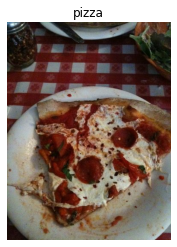

In [ ]:
  #View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/", target_class="pizza")


In [ ]:
img

array([[[ 58, 112, 136],
        [ 77, 131, 155],
        [ 72, 123, 150],
        ...,
        [ 54,  46,  35],
        [ 50,  46,  35],
        [ 82,  78,  69]],

       [[ 67, 117, 144],
        [ 82, 132, 159],
        [ 78, 128, 155],
        ...,
        [ 40,  34,  22],
        [ 56,  54,  42],
        [ 89,  86,  77]],

       [[ 73, 118, 147],
        [ 83, 128, 159],
        [ 85, 130, 161],
        ...,
        [ 30,  28,  15],
        [ 66,  66,  54],
        [ 94,  96,  83]],

       ...,

       [[ 29,   9,   8],
        [ 29,   9,   8],
        [ 29,   9,   8],
        ...,
        [ 99,  46,  42],
        [106,  53,  49],
        [111,  57,  55]],

       [[ 29,   9,   8],
        [ 28,   8,   7],
        [ 27,   7,   6],
        ...,
        [104,  50,  40],
        [104,  49,  42],
        [101,  46,  39]],

       [[ 32,  12,  11],
        [ 29,   9,   8],
        [ 27,   7,   6],
        ...,
        [105,  51,  39],
        [107,  53,  41],
        [107,  53,  43]]

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 384, 3), dtype=uint8, numpy=
array([[[ 58, 112, 136],
        [ 77, 131, 155],
        [ 72, 123, 150],
        ...,
        [ 54,  46,  35],
        [ 50,  46,  35],
        [ 82,  78,  69]],

       [[ 67, 117, 144],
        [ 82, 132, 159],
        [ 78, 128, 155],
        ...,
        [ 40,  34,  22],
        [ 56,  54,  42],
        [ 89,  86,  77]],

       [[ 73, 118, 147],
        [ 83, 128, 159],
        [ 85, 130, 161],
        ...,
        [ 30,  28,  15],
        [ 66,  66,  54],
        [ 94,  96,  83]],

       ...,

       [[ 29,   9,   8],
        [ 29,   9,   8],
        [ 29,   9,   8],
        ...,
        [ 99,  46,  42],
        [106,  53,  49],
        [111,  57,  55]],

       [[ 29,   9,   8],
        [ 28,   8,   7],
        [ 27,   7,   6],
        ...,
        [104,  50,  40],
        [104,  49,  42],
        [101,  46,  39]],

       [[ 32,  12,  11],
        [ 29,   9,   8],
        [ 27,   7,   6],
        ...,
        [105,  51,  3

In [ ]:
# View the image shape
img.shape # Returns width, height, color_channels

(512, 384, 3)

In [ ]:
# get all the image values between 0-1
img/225.0

array([[[0.25777778, 0.49777778, 0.60444444],
        [0.34222222, 0.58222222, 0.68888889],
        [0.32      , 0.54666667, 0.66666667],
        ...,
        [0.24      , 0.20444444, 0.15555556],
        [0.22222222, 0.20444444, 0.15555556],
        [0.36444444, 0.34666667, 0.30666667]],

       [[0.29777778, 0.52      , 0.64      ],
        [0.36444444, 0.58666667, 0.70666667],
        [0.34666667, 0.56888889, 0.68888889],
        ...,
        [0.17777778, 0.15111111, 0.09777778],
        [0.24888889, 0.24      , 0.18666667],
        [0.39555556, 0.38222222, 0.34222222]],

       [[0.32444444, 0.52444444, 0.65333333],
        [0.36888889, 0.56888889, 0.70666667],
        [0.37777778, 0.57777778, 0.71555556],
        ...,
        [0.13333333, 0.12444444, 0.06666667],
        [0.29333333, 0.29333333, 0.24      ],
        [0.41777778, 0.42666667, 0.36888889]],

       ...,

       [[0.12888889, 0.04      , 0.03555556],
        [0.12888889, 0.04      , 0.03555556],
        [0.12888889, 0

#An end to end example
## A (typical) architecture of a convolutional neural network

Convolutional neural networks are no different to other kinds of deep learning neural networks in the fact they can be created in many different ways. What you see below are some components you'd expect to find in a traditional CNN.

Components of a convolutional neural network:


| **Hyperparameter/Layer type** | **What does it do?** | **Typical values** |
| ----- | ----- | ----- |
| Input image(s) | Target images you'd like to discover patterns in| Whatever you can take a photo (or video) of |
| Input layer | Takes in target images and preprocesses them for further layers | `input_shape = [batch_size, image_height, image_width, color_channels]` |
| Convolution layer | Extracts/learns the most important features from target images | Multiple, can create with [`tf.keras.layers.ConvXD`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) (X can be multiple values) |
| Hidden activation | Adds non-linearity to learned features (non-straight lines) | Usually ReLU ([`tf.keras.activations.relu`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu)) |
| Pooling layer | Reduces the dimensionality of learned image features | Average ([`tf.keras.layers.AvgPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D)) or Max ([`tf.keras.layers.MaxPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)) |
| Fully connected layer | Further refines learned features from convolution layers | [`tf.keras.layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) |
| Output layer | Takes learned features and outputs them in shape of target labels | `output_shape = [number_of_classes]` (e.g. 3 for pizza, steak or sushi)|
| Output activation | Adds non-linearities to output layer | [`tf.keras.activations.sigmoid`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid) (binary classification) or [`tf.keras.activations.softmax`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) |


How they stack together:

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-simple-convnet.png)
*A simple example of how you might stack together the above layers into a convolutional neural network. Note the convolutional and pooling layers can often be arranged and rearranged into many different formations.*

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Set the seed
tf.random.set_seed(42)
# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
# Setup the train and test directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"
# Import data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                              seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                              seed=42)
## Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation='relu',
                         input_shape=(224,224,3)),
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation='relu',
                         ),
  tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation='relu',
                         ),
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation='relu',
                         ),
  tf.keras.layers.MaxPool2D(pool_size=2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units=1, activation="sigmoid")
])
#Compile our CNN model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])
# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 41s 201ms/step - loss: 0.5594 - accuracy: 0.7047 - val_loss: 0.4532 - val_accuracy: 0.7720
Epoch 2/5
47/47 [==============================] - 9s 183ms/step - loss: 0.4161 - accuracy: 0.8187 - val_loss: 0.3425 - val_accuracy: 0.8560
Epoch 3/5
47/47 [==============================] - 9s 184ms/step - loss: 0.3870 - accuracy: 0.8247 - val_loss: 0.3532 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 9s 185ms/step - loss: 0.3548 - accuracy: 0.8507 - val_loss: 0.2986 - val_accuracy: 0.8880
Epoch 5/5
47/47 [==============================] - 9s 189ms/step - loss: 0.3183 - accuracy: 0.8647 - val_loss: 0.2866 - val_accuracy: 0.8700


In [ ]:
len(train_data)

47

In [ ]:
1500/32

46.875

## Using the same model as before

To examplify how neural networks can be adapted to many different problems, let's see how a binary classification model we've previously built might work with our data.

> 🔑 **Note:** If you haven't gone through the previous classification notebook, no troubles, we'll be bringing in the a simple 4 layer architecture used to separate dots replicated from the [TensorFlow Playground environment](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.75075&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).

We can use all of the same parameters in our previous model except for changing two things:
* **The data** - we're now working with images instead of dots.
* **The input shape** - we have to tell our neural network the shape of the images we're working with.
  * A common practice is to reshape images all to one size. In our case, we'll resize the images to `(224, 224, 3)`, meaning a height and width of 224 pixels and a depth of 3 for the red, green, blue colour channels.

In [ ]:
# Set random seed
tf.random.set_seed(43)
# create a model to replicate the TensorFlow playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224,224,3)),
  tf.keras.layers.Dense(units=4, activation='relu'),
  tf.keras.layers.Dense(units=4, activation='relu'),
  tf.keras.layers.Dense(units=1, activation='sigmoid')

])
#Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
#Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 8s 174ms/step - loss: 0.6971 - accuracy: 0.4960 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 172ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 171ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 169ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 171ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
# Check out our second model's architecture
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

Wow. One of the most noticeable things here is the much larger number of parameters in `model_2` versus `model_1`.

`model_2` has 602,141 trainable parameters where as `model_1` has only 31,101. And despite this difference, `model_1` still far and large out performs `model_2`.

> 🔑 **Note:** You can think of trainable parameters as *patterns a model can learn from data*. Intuitiely, you might think more is better. And in some cases it is. But in this case, the difference here is in the two different styles of model we're using. Where a series of dense layers have a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**. So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in decphering between different **features** in an image.

Since our previous model didn't work, do you have any ideas of how we might make it work?

How about we increase the number of layers? 

And maybe even increase the number of neurons in each layer?

More specifically, we'll increase the number of neurons (also called hidden units) in each dense layer from 4 to 100 and add an extra layer.

> 🔑 **Note:** Adding extra layers or increasing the number of neurons in each layer is often referred to as increasing the **complexity** of your model.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model similar to model_1 but add an extra layer and increase the number of hidden units in each layer
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'), # increase number of neurons from 4 to 100 (for each layer)
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), # add an extra layer
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 177ms/step - loss: 3.3864 - accuracy: 0.6047 - val_loss: 1.0389 - val_accuracy: 0.7400
Epoch 2/5
47/47 [==============================] - 8s 170ms/step - loss: 0.8734 - accuracy: 0.6987 - val_loss: 0.4795 - val_accuracy: 0.7840
Epoch 3/5
47/47 [==============================] - 8s 169ms/step - loss: 0.8806 - accuracy: 0.6780 - val_loss: 0.7383 - val_accuracy: 0.6480
Epoch 4/5
47/47 [==============================] - 8s 172ms/step - loss: 0.6007 - accuracy: 0.7580 - val_loss: 0.4815 - val_accuracy: 0.7700
Epoch 5/5
47/47 [==============================] - 8s 171ms/step - loss: 0.5076 - accuracy: 0.7600 - val_loss: 0.7093 - val_accuracy: 0.6220


## Binary classification: Let's break it down

We just went through a whirlwind of steps:

1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat your baseline)
7. Repeat until satisfied

Let's step through each.

['10380.jpg']
Image Shape: (288, 512, 3)
['1899785.jpg']
Image Shape: (512, 512, 3)


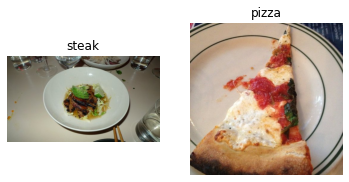

In [ ]:
#Visualize data
# Visualize data (requires function 'view_random_image' above)
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

In [ ]:
#Preprocess the data
# Define training and test directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"
# Create train and test data generators and rescale the data 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
#Get a sample of test data batch
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there
len(train_data)

47

In [ ]:
round(1500/32)

47

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [ ]:
labels.shape

(32,)

In [ ]:
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a model (start with a baseline)

we might be wondering what our default model architecture should be.

And the truth is, there's many possible answers to this question.

A simple heuristic for computer vision models is to use the model architecture which is performing best on [ImageNet](https://www.image-net.org/) (a large collection of diverse images to benchmark different computer vision models).

However, to begin with, it's good to build a smaller model to acquire a baseline result which you try to improve upon.

> 🔑 **Note:** In deep learning a smaller model often refers to a model with less layers than the state of the art (SOTA). For example, a smaller model might have 3-4 layers where as a state of the art model, such as, ResNet50 might have 50+ layers.

In our case, let's take a smaller version of the model that can be found on the [CNN explainer website](https://poloclub.github.io/cnn-explainer/) (`model_1` from above) and build a 3 layer convolutional neural network.

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_4 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding="valid",
         activation='relu',
         input_shape=(224,224,3)), ## input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(units=1, activation="sigmoid") # output layer (specify output shape)
])

In [ ]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
# Check the length of the training and test data
len(train_data), len(test_data)


(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data, # this is a combination of label and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data)
                        )

Epoch 1/5
47/47 [==============================] - 10s 191ms/step - loss: 1.3383 - accuracy: 0.5980 - val_loss: 0.5227 - val_accuracy: 0.7640
Epoch 2/5
47/47 [==============================] - 9s 186ms/step - loss: 0.5098 - accuracy: 0.7673 - val_loss: 0.4451 - val_accuracy: 0.8060
Epoch 3/5
47/47 [==============================] - 9s 187ms/step - loss: 0.3830 - accuracy: 0.8493 - val_loss: 0.3911 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 9s 187ms/step - loss: 0.2150 - accuracy: 0.9293 - val_loss: 0.3957 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 9s 184ms/step - loss: 0.0800 - accuracy: 0.9813 - val_loss: 0.4738 - val_accuracy: 0.8100


In [ ]:
model_1.evaluate(test_data)

16/16 [==============================] - 2s 127ms/step - loss: 0.2866 - accuracy: 0.8700


[0.28662413358688354, 0.8700000047683716]

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

# Evaluating our model

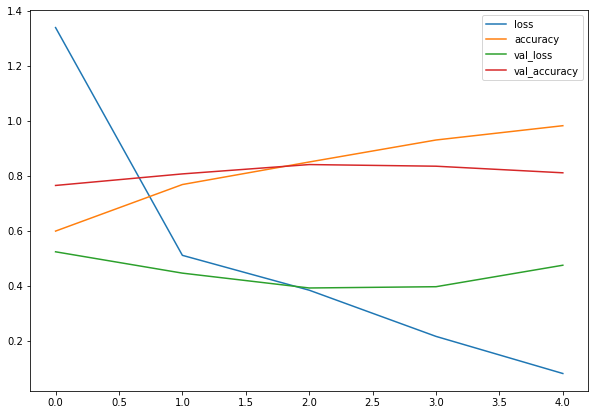

In [ ]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [ ]:
# Plot the validation and training curves seperately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss'])) # How many epochs did we run for

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.xlabel("Epochs")
  plt.title("Accuracy")
  plt.legend();

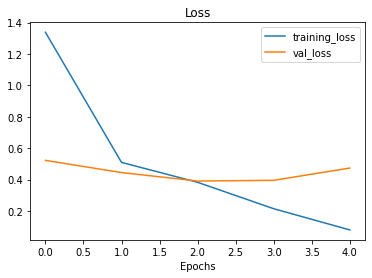

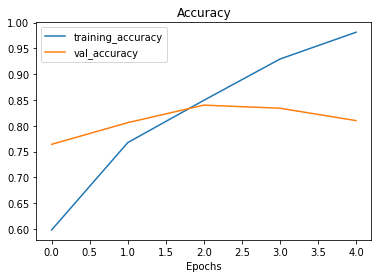

In [ ]:
plot_loss_curves(history=history_4)

Judging by our loss curves, it looks like our model is **overfitting** the training dataset.

> 🔑 **Note:** When a model's **validation loss starts to increase**, it's likely that it's overfitting the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus its ability to generalize to unseen data will be diminished.

To further inspect our model's training performance, let's separate the accuracy and loss curves.

### 6. Adjust the model parameters

Fitting a machine learning model  comes in 3 steps:
0. Create a basline.
1. Beat the baseline by overfitting a larger model.
2. Reduce overfitting.

So far we've gone through steps 0 and 1.

And there are even a few more things we could try to further overfit our model:
* Increase the number of convolutional layers.
* Increase the number of convolutional filters.
* Add another dense layer to the output of our flattened layer.

But what we'll do instead is focus on getting our model's training curves to better align with eachother, in other words, we'll take on step 2.

Why is reducing overfitting important?

When a model performs too well on training data and poorly on unseen data, it's not much use to us if we wanted to use it in the real world.

Say we were building a pizza vs. steak food classifier app, and our model performs very well on our training data but when users tried it out, they didn't get very good results on their own food images, is that a good experience?

Not really...

So for the next few models we build, we're going to adjust a number of parameters and inspect the training curves along the way.

Namely, we'll build 2 more models:
* A ConvNet with [max pooling](https://deeplizard.com/learn/video/ZjM_XQa5s6s)
* A ConvNet with max pooling and data augmentation

For the first model, we'll follow the structure:

```
# Basic structure of CNN with max pooling
Input -> Conv layers + ReLU layers (non-linearities) + Max Pooling layers -> Fully connected (dense layer) as Output
```

Let's built it. It'll have the same structure as `model_4` but with a [`MaxPool2D()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layer after each convolutional layer.

In [ ]:
# Create a model (This is going to be our new baseline)
model_5 = Sequential([
  Conv2D(10,3, activation='relu', input_shape=(224,224,3)),
  MaxPool2D(pool_size=2),
  Conv2D(10,3,activation='relu'),
  MaxPool2D(pool_size=2),
  Conv2D(10,3,activation='relu'),
  MaxPool2D(pool_size=2),
  Flatten(),
  Dense(units=1, activation='sigmoid')
])

In [ ]:
#Compile the model
model_5.compile(loss = "binary_crossentropy",
                optimizer= Adam(learning_rate=0.001),
                metrics=["accuracy"])

In [ ]:
history_5 = model_5.fit(train_data, epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 182ms/step - loss: 0.6568 - accuracy: 0.6327 - val_loss: 0.5131 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 8s 175ms/step - loss: 0.4769 - accuracy: 0.7800 - val_loss: 0.4434 - val_accuracy: 0.7900
Epoch 3/5
47/47 [==============================] - 8s 178ms/step - loss: 0.4372 - accuracy: 0.8093 - val_loss: 0.3872 - val_accuracy: 0.8180
Epoch 4/5
47/47 [==============================] - 8s 176ms/step - loss: 0.3965 - accuracy: 0.8267 - val_loss: 0.3551 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 8s 177ms/step - loss: 0.3758 - accuracy: 0.8373 - val_loss: 0.3669 - val_accuracy: 0.8440


In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6760)             

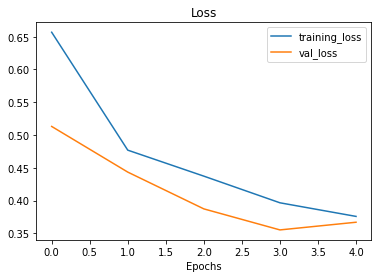

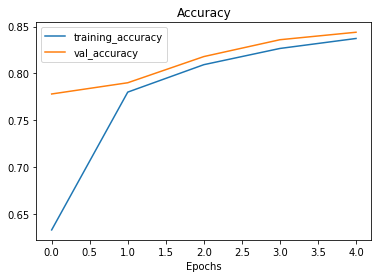

In [ ]:
# Plot loss curves of model_5 results
plot_loss_curves(history_5)

In [ ]:
# Tips: Reducing overfitting is also known as regularization

#Data Augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # rotate the image slightly
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

> 🤔 **Question:** What's data augmentation?

**Data augmentation** is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Doing this simulates the kind of data a model might be used on in the real world.

If we're building a pizza vs. steak application, not all of the images our users take might be in similar setups to our training data. Using data augmentation gives us another way to prevent overfitting and in turn make our model more generalizable.

> 🔑 **Note:** Data augmentation is usally only performed on the training data. Using the `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are randomly manipulated when loaded into the model.

In [ ]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


# Data Augmentation is usually performed on the training data. Using ImageDataGenerator built-in data augmentation parameters our images are left as they are in the directories but modified as they are loaded into the model.

In [ ]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Labels aren't augmented, only data

Showing image number 21


(-0.5, 223.5, 223.5, -0.5)

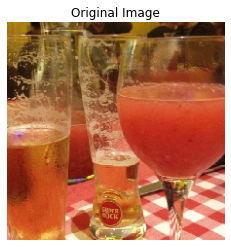

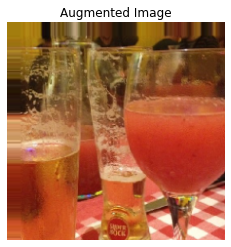

In [ ]:
# show the original image and the augmented image
import random
random_number = random.randint(0,32) # Our batch_size is 32
print(f"Showing image number {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)

plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Image")
plt.axis(False)

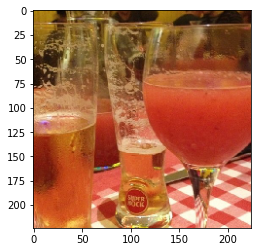

In [ ]:
plt.imshow(images[21])

In [ ]:
# Create a model with the augmented data
# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 20s 422ms/step - loss: 0.7356 - accuracy: 0.5033 - val_loss: 0.6854 - val_accuracy: 0.5220
Epoch 2/5
47/47 [==============================] - 19s 415ms/step - loss: 0.6893 - accuracy: 0.5427 - val_loss: 0.6806 - val_accuracy: 0.5220
Epoch 3/5
47/47 [==============================] - 20s 416ms/step - loss: 0.6723 - accuracy: 0.6440 - val_loss: 0.5960 - val_accuracy: 0.7820
Epoch 4/5
47/47 [==============================] - 20s 418ms/step - loss: 0.6389 - accuracy: 0.6307 - val_loss: 0.5783 - val_accuracy: 0.6900
Epoch 5/5
47/47 [==============================] - 20s 416ms/step - loss: 0.6154 - accuracy: 0.7000 - val_loss: 0.5613 - val_accuracy: 0.6900


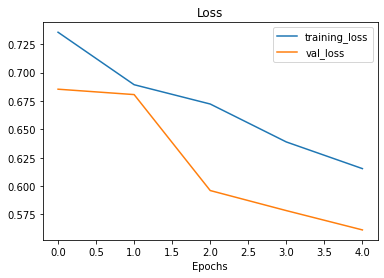

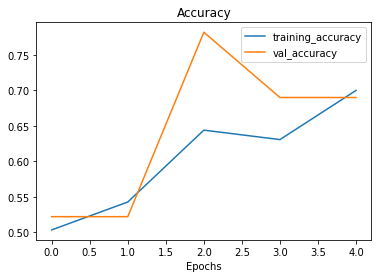

In [ ]:
#Check model training curves
plot_loss_curves(history_6)

In [ ]:
# Import data and augment it from directories and shuffle it
train_data_augmented_shuffled=train_datagen_augmented.flow_from_directory(train_dir,
                                                                          target_size=(224,224),
                                                                          batch_size=32,
                                                                          class_mode="binary",
                                                                          shuffle=True) # Shuffle the data(default)
                                                                          

Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 20s 422ms/step - loss: 0.6710 - accuracy: 0.5847 - val_loss: 0.6135 - val_accuracy: 0.6760
Epoch 2/5
47/47 [==============================] - 20s 423ms/step - loss: 0.5626 - accuracy: 0.7080 - val_loss: 0.4577 - val_accuracy: 0.7700
Epoch 3/5
47/47 [==============================] - 20s 422ms/step - loss: 0.4886 - accuracy: 0.7673 - val_loss: 0.6850 - val_accuracy: 0.6680
Epoch 4/5
47/47 [==============================] - 20s 421ms/step - loss: 0.4869 - accuracy: 0.7833 - val_loss: 0.4723 - val_accuracy: 0.7680
Epoch 5/5
47/47 [==============================] - 20s 423ms/step - loss: 0.4802 - accuracy: 0.7780 - val_loss: 0.3355 - val_accuracy: 0.8660


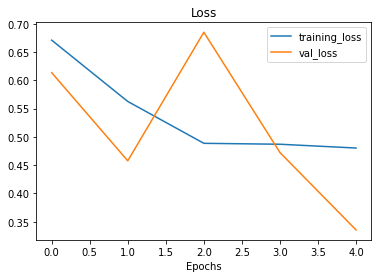

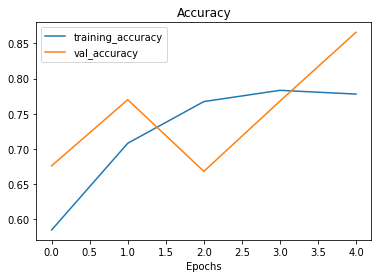

In [ ]:
plot_loss_curves(history_7)

> 🔑 **Note:** You might've noticed we used some slightly different code to build `model_8` as compared to `model_1`. This is because of the imports we did before, such as `from tensorflow.keras.layers import Conv2D` reduce the amount of code we had to write. Although the code is different, the architectures are the same.

### 7. Repeat until satisified

We've trained a few model's on our dataset already and so far they're performing pretty good.

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:
* Increase the number of model layers (e.g. add more convolutional layers).
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32, 64, or 128, these numbers aren't set in stone either, they are usually found through trial and error).
* Train for longer (more epochs).
* Finding an ideal learning rate.
* Get more data (give the model more opportunities to learn).
* Use **transfer learning** to leverage what another image model has learned and adjust it for our own use case.

Adjusting each of these settings (except for the last two) during model development is usually referred to as **hyperparameter tuning**.

You can think of hyperparameter tuning as simialr to adjusting the settings on your oven to cook your favourite dish. Although your oven does most of the cooking for you, you can help it by tweaking the dials.

Let's go back to right where we started and try our original model (`model_1` or the TinyVGG architecture from [CNN explainer](https://poloclub.github.io/cnn-explainer/)).


In [ ]:

# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 21s 435ms/step - loss: 0.6336 - accuracy: 0.6293 - val_loss: 0.4246 - val_accuracy: 0.8120
Epoch 2/5
47/47 [==============================] - 20s 427ms/step - loss: 0.5216 - accuracy: 0.7427 - val_loss: 0.3860 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 20s 427ms/step - loss: 0.4954 - accuracy: 0.7687 - val_loss: 0.4285 - val_accuracy: 0.8120
Epoch 4/5
47/47 [==============================] - 20s 426ms/step - loss: 0.5054 - accuracy: 0.7567 - val_loss: 0.4573 - val_accuracy: 0.8220
Epoch 5/5
47/47 [==============================] - 20s 430ms/step - loss: 0.5059 - accuracy: 0.7667 - val_loss: 0.3932 - val_accuracy: 0.8220


In [ ]:
# Check model_1 architecture (same as model_8)
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [ ]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 28090)            

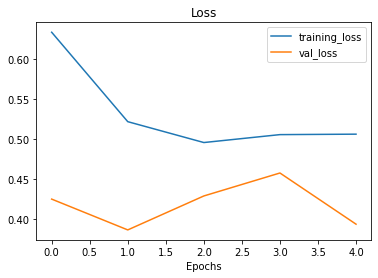

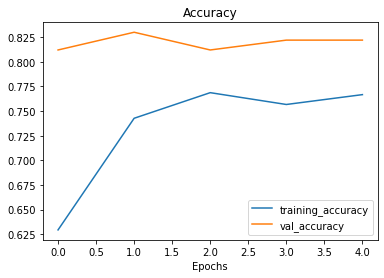

In [ ]:
# Check out the TinyVGG model performance
plot_loss_curves(history_8)

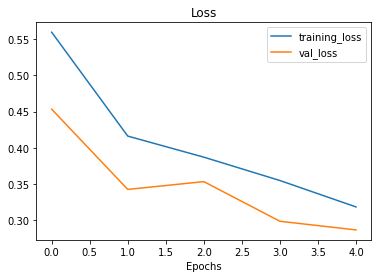

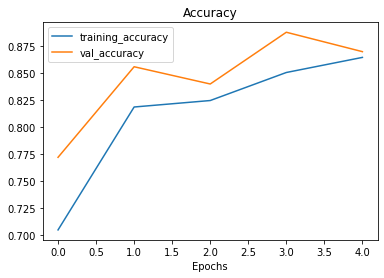

In [ ]:
# How does this training curve look compared to the one above?
plot_loss_curves(history_1)

In [ ]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2021-06-10 09:22:44--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.03s   

2021-06-10 09:22:45 (54.0 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



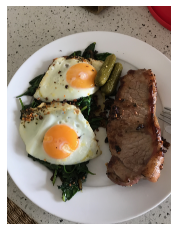

In [ ]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

In [ ]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 109],
        [142, 122,  98],
        [101,  80,  59],
        ...,
        [165, 154, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  95],
        [139, 117,  93],
        [106,  86,  62],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 127, 100],
        [149, 127, 103],
        [114,  94,  70],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [145, 132, 126]]

In [ ]:
expanded_steak = tf.expand_dims(steak,axis=0)

In [ ]:
expanded_steak.shape

TensorShape([1, 4032, 3024, 3])

Since our model takes in images of shapes `(224, 224, 3)`, we've got to reshape our custom image to use it with our model.

To do so, we can import and decode our image using [`tf.io.read_file`](https://www.tensorflow.org/api_docs/python/tf/io/read_file) (for readining files) and [`tf.image`](https://www.tensorflow.org/api_docs/python/tf/image) (for resizing our image and turning it into a tensor).

> 🔑 **Note:** For your model to make predictions on unseen data, for example, your own custom images, the custom image has to be in the same shape as your model has been trained on. In more general terms, to make predictions on custom data it has to be in the same form that your model has been trained on.

In [ ]:
# Create a function to import an image and resize it to be able to be used with our modle
def load_and_prep_image(filename, img_shape=224):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (Normalize)
  img = img/255.0
  return img
  

In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

There's one more problem...

Although our image is in the same shape as the images our model has been trained on, we're still missing a dimension.

Remember how our model was trained in batches?

Well, the batch size becomes the first dimension.

So in reality, our model was trained on data in the shape of `(batch_size, 224, 224, 3)`.

We can fix this by adding an extra to our custom image tensor using [`tf.expand_dims`](https://www.tensorflow.org/api_docs/python/tf/expand_dims).

In [ ]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

array([[0.9030897]], dtype=float32)

In [ ]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);


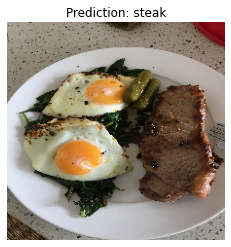

In [ ]:
# Test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg")

--2021-06-10 09:22:47--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.04s   

2021-06-10 09:22:47 (72.4 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



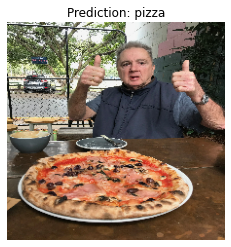

In [ ]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)

## Multi-class Classification

We've referenced the TinyVGG architecture from the CNN Explainer website multiple times through this notebook, however, the CNN Explainer website works with 10 different image classes, where as our current model only works with two classes (pizza and steak).

> 🛠 **Practice:** Before scrolling down, how do you think we might change our model to work with 10 classes of the same kind of images? Assume the data is in the same style as our two class problem.

Remember the steps we took before to build our pizza 🍕 vs. steak 🥩 classifier?

How about we go through those steps again, except this time, we'll work with 10 different types of food.

1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat your baseline)
7. Repeat until satisfied

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/misc-tensorflow-workflow-outline.png)
*The workflow we're about to go through is a slightly modified version of the above image. As you keep going through deep learning problems, you'll find the workflow above is more of an outline than a step-by-step guide.*

### 1. Import and become one with the data

Again, we've got a subset of the [Food101 dataset](https://www.kaggle.com/dansbecker/food-101). In addition to the pizza and steak images, we've pulled out another eight classes.


In [ ]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()


--2021-06-10 09:22:47--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.63.128, 142.250.31.128, 142.250.73.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.63.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   219MB/s    in 2.3s    

2021-06-10 09:22:50 (219 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.

In [ ]:
!ls -la 10_food_classes_all_data

total 16
drwxr-xr-x  4 root root 4096 Jun 10 09:22 .
drwxr-xr-x  1 root root 4096 Jun 10 09:22 ..
drwxr-xr-x 12 root root 4096 Jun 10 09:22 test
drwxr-xr-x 12 root root 4096 Jun 10 09:22 train


In [ ]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np 
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['405794.jpg']
Image Shape: (512, 382, 3)


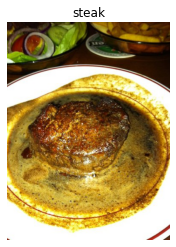

In [ ]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_dir, target_class=random.choice(class_names))


### 2. Preprocess the data (prepare it for a model)

After going through a handful of images (it's good to visualize at least 10-100 different examples), it looks like our data directories are setup correctly.

Time to preprocess the data.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.0)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


As with binary classifcation, we've creator image generators. The main change this time is that we've changed the `class_mode` parameter to `'categorical'` because we're dealing with 10 classes of food images.

Everything else like rescaling the images, creating the batch size and target image size stay the same.

> 🤔 **Question:** Why is the image size 224x224? This could actually be any size we wanted, however, 224x224 is a very common size for preprocessing images to. Depending on your problem you might want to use larger or smaller images.

### 3. Create a model (start with a baseline)

We can use the same model (TinyVGG) we used for the binary classification problem for our multi-class classification problem with a couple of small tweaks.

Namely:
* Changing the output layer to use have 10 ouput neurons (the same number as the number of classes we have).
* Changing the output layer to use `'softmax'` activation instead of `'sigmoid'` activation.
* Changing the loss function to be `'categorical_crossentropy'` instead of `'binary_crossentropy'`.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_9 = Sequential([
   Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])
# Compile the model
model_9.compile(loss= tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [ ]:
model_9.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 28090)            

In [ ]:
# Fit the model
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 44s 188ms/step - loss: 2.1823 - accuracy: 0.1908 - val_loss: 2.0089 - val_accuracy: 0.2772
Epoch 2/5
235/235 [==============================] - 43s 184ms/step - loss: 1.9205 - accuracy: 0.3277 - val_loss: 1.9890 - val_accuracy: 0.3060
Epoch 3/5
235/235 [==============================] - 43s 184ms/step - loss: 1.5095 - accuracy: 0.4860 - val_loss: 2.0801 - val_accuracy: 0.2976
Epoch 4/5
235/235 [==============================] - 43s 184ms/step - loss: 0.8984 - accuracy: 0.7060 - val_loss: 2.8040 - val_accuracy: 0.2856
Epoch 5/5
235/235 [==============================] - 43s 184ms/step - loss: 0.3700 - accuracy: 0.8824 - val_loss: 3.8805 - val_accuracy: 0.2576


# Evaluate the model

In [ ]:
# Evaluate on the test data
model_9.evaluate(test_data)

79/79 [==============================] - 10s 129ms/step - loss: 3.8805 - accuracy: 0.2576


[3.8805251121520996, 0.25760000944137573]

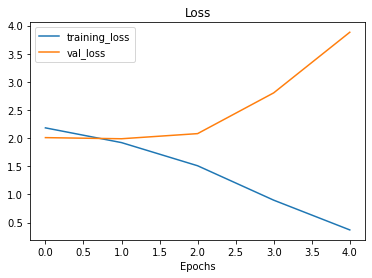

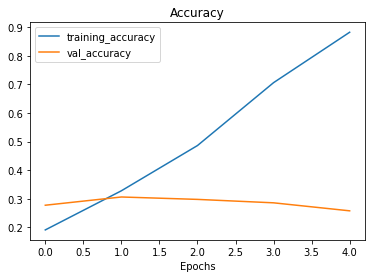

In [ ]:
# Check out the model's loss curves on the 10 classes of data (note: this function comes from above in the notebook)
plot_loss_curves(history_9)

Woah, that's quite the gap between the training and validation loss curves.

What does this tell us?

It seems our model is **overfitting** the training set quite badly. In other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test data.

### 6. Adjust the model parameters

Due to its performance on the training data, it's clear our model is learning something. However, performing well on the training data is like going well in the classroom but failing to use your skills in real life.

Ideally, we'd like our model to perform as well on the test data as it does on the training data.

So our next steps will be to try and prevent our model overfitting. A couple of ways to prevent overfitting include:

- **Get more data** - Having more data gives the model more opportunities to learn patterns, patterns which may be more generalizable to new examples.
- **Simplify model** - If the current model is already overfitting the training data, it may be too complicated of a model. This means it's learning the patterns of the data too well and isn't able to generalize well to unseen data. One way to simplify a model is to reduce the number of layers it uses or to reduce the number of hidden units in each layer.
- **Use data augmentation** - Data augmentation manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data.
- **Use transfer learning** - Transfer learning involves leverages the patterns (also called pretrained weights) one model has learned to use as the foundation for your own task. In our case, we could use one computer vision model pretrained on a large variety of images and then tweak it slightly to be more specialized for food images.

> 🔑 **Note:** Preventing overfitting is also referred to as **regularization**.

If you've already got an existing dataset, you're probably most likely to try one or a combination of the last three above options first.

Since collecting more data would involve us manually taking more images of food, let's try the ones we can do from right within the notebook.

How about we simplify our model first?

To do so, we'll remove two of the convolutional layers, taking the total number of convolutional layers from four to two.

In [ ]:
# Try a simplified model (removed two layers)
model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 42s 176ms/step - loss: 2.1520 - accuracy: 0.2541 - val_loss: 1.9748 - val_accuracy: 0.3132
Epoch 2/5
235/235 [==============================] - 41s 174ms/step - loss: 1.8040 - accuracy: 0.3853 - val_loss: 1.8846 - val_accuracy: 0.3520
Epoch 3/5
235/235 [==============================] - 41s 177ms/step - loss: 1.4572 - accuracy: 0.5211 - val_loss: 2.0630 - val_accuracy: 0.3196
Epoch 4/5
235/235 [==============================] - 41s 175ms/step - loss: 1.0158 - accuracy: 0.6784 - val_loss: 2.1772 - val_accuracy: 0.3268
Epoch 5/5
235/235 [==============================] - 41s 174ms/step - loss: 0.5765 - accuracy: 0.8315 - val_loss: 2.4835 - val_accuracy: 0.2820


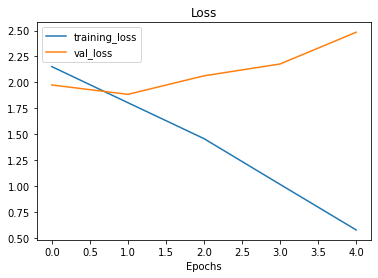

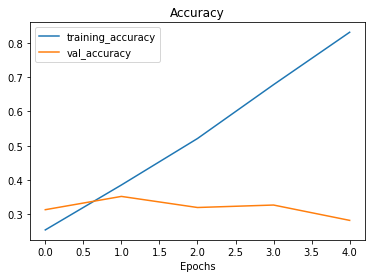

In [ ]:
# Check out the loss curves of model_10
plot_loss_curves(history_10)

In [ ]:
model_10.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 54, 54, 10)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 29160)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                291610    
Total params: 292,800
Trainable params: 292,800
Non-trainable params: 0
________________________________________________

In [ ]:
model_9.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 28090)            

Hmm... even with a simplifed model, it looks like our model is still dramatically overfitting the training data.

What else could we try?

How about **data augmentation**?

Data augmentation makes it harder for the model to learn on the training data and in turn, hopefully making the patterns it learns more generalizable to unseen data.

To create augmented data, we'll recreate a new [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) instance, this time adding some parameters such as `rotation_range` and `horizontal_flip` to manipulate our images.

In [ ]:
# Create augmented data generator instance
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


Now we've got augmented data, let's see how it works with the same model as before (`model_10`).

Rather than rewrite the model from scratch, we can clone it using a handy function in TensorFlow called [`clone_model`](https://www.tensorflow.org/api_docs/python/tf/keras/models/clone_model) which can take an existing model and rebuild it in the same format. 

The cloned version will not include any of the weights (patterns) the original model has learned. So when we train it, it'll be like training a model from scratch.

> 🔑 **Note:** One of the key practices in deep learning and machine learning in general is to **be a serial experimenter**. That's what we're doing here. Trying something, seeing if it works, then trying something else. A good experiment setup also keeps track of the things you change, for example, that's why we're using the same model as before but with different data. The model stays the same but the data changes, this will let us know if augmented training data has any influence over performance.

In [ ]:
# Clone the model (use the same architecture)
model_11 = tf.keras.models.clone_model(model_10)
# Compile the cloned model (same setup as used for model_10)
model_11.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_11 = model_11.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 98s 417ms/step - loss: 2.2752 - accuracy: 0.1713 - val_loss: 2.0455 - val_accuracy: 0.2860
Epoch 2/5
235/235 [==============================] - 98s 417ms/step - loss: 2.0698 - accuracy: 0.2651 - val_loss: 1.9675 - val_accuracy: 0.2984
Epoch 3/5
235/235 [==============================] - 98s 417ms/step - loss: 2.0139 - accuracy: 0.2980 - val_loss: 1.8691 - val_accuracy: 0.3576
Epoch 4/5
235/235 [==============================] - 98s 417ms/step - loss: 1.9814 - accuracy: 0.3071 - val_loss: 1.8355 - val_accuracy: 0.3692
Epoch 5/5
235/235 [==============================] - 98s 416ms/step - loss: 1.9623 - accuracy: 0.3207 - val_loss: 1.8111 - val_accuracy: 0.3856


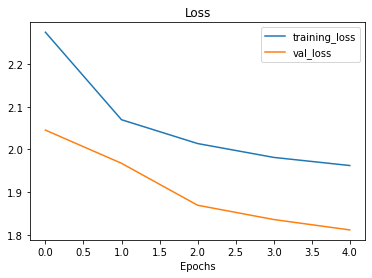

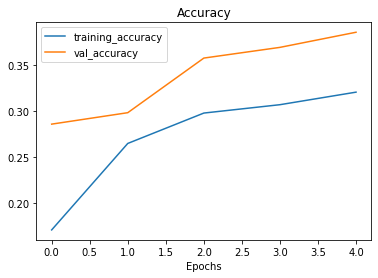

In [ ]:
# Check out our model's performance with augmented data
plot_loss_curves(history_11)

### 7. Repeat until satisfied

We could keep going here. Restructuring our model's architecture, adding more layers, trying it out, adjusting the learning rate, trying it out, trying different methods of data augmentation, training for longer. But as you could image, this could take a fairly long time.

Good thing there's still one trick we haven't tried yet and that's **transfer learning**.

However, we'll save that for the next notebook where you'll see how rather than design our own models from scratch we leverage the patterns another model has learned for our own task.

In the meantime, let's make a prediction with our trained multi-class model.

### Making a prediction with our trained model

What good is a model if you can't make predictions with it?

Let's first remind ourselves of the classes our multi-class model has been trained on and then we'll download some of own custom images to work with.

In [ ]:
# What classes has our model been trained on?
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

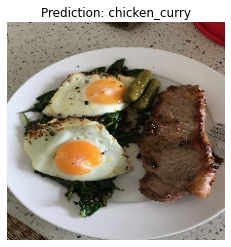

In [ ]:
# Make a prediction using model_11
pred_and_plot(model=model_11, 
              filename="03-steak.jpeg", 
              class_names=class_names)

In [ ]:
# Reconfig pred_and_plot function for multiclass
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multiclass
  if len(pred[0] > 1):
    pred_class = class_names[int(tf.argmax(pred[0]))] # for multiclass classification
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # Get the predicted class for binary classification

  # Get the predicted class

  

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);


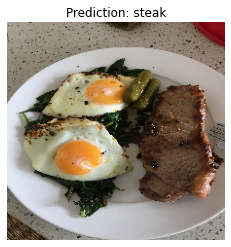

In [ ]:
# Make a prediction using model_11
pred_and_plot(model=model_11, 
              filename="03-steak.jpeg", 
              class_names=class_names)

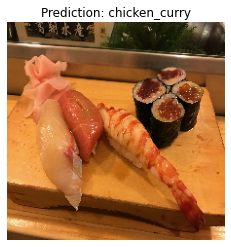

In [ ]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

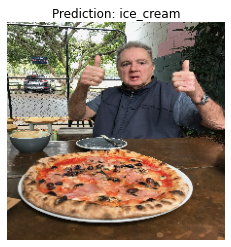

In [ ]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

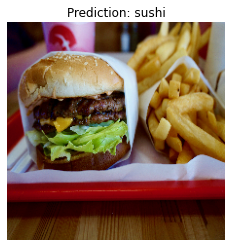

In [ ]:
pred_and_plot(model_11, "03-hamburger.jpeg", class_names)

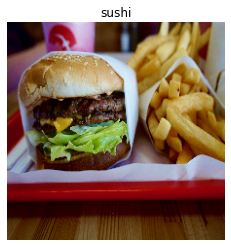

In [ ]:
# Load in and preprocess our custom image
img = load_and_prep_image("03-hamburger.jpeg")

# Make a prediction
pred = model_11.predict(tf.expand_dims(img, axis=0))

# Match the prediction class to the highest prediction probability
pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);

In [ ]:
# Check the output of the predict function
pred = model_11.predict(tf.expand_dims(img, axis=0))
pred

array([[0.08617314, 0.05567163, 0.07197127, 0.14239249, 0.08285464,
        0.10217366, 0.03779509, 0.05780401, 0.25222787, 0.11093618]],
      dtype=float32)

In [ ]:
# Find the predicted class name
class_names[pred.argmax()]

'steak'

In [ ]:
# save a model
model_11.save("/content/drive/MyDrive/TensorFlow2.0_certification/saved_model/saved_trained_model_CNN")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/TensorFlow2.0_certification/saved_model/saved_trained_model_CNN/assets


In [ ]:
# Load in a model and evaluate it
loaded_model_11 = tf.keras.models.load_model("/content/drive/MyDrive/TensorFlow2.0_certification/saved_model/saved_trained_model_CNN")
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 10s 126ms/step - loss: 1.8111 - accuracy: 0.3856


[1.811139702796936, 0.3856000006198883]

In [ ]:
# Compare our unsaved model's results (same as above)
model_11.evaluate(test_data)

79/79 [==============================] - 10s 127ms/step - loss: 1.8111 - accuracy: 0.3856


[1.811139702796936, 0.3856000006198883]